<a href="https://colab.research.google.com/github/CasCard/Machile-Learning-Project/blob/master/FashionMNIST_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

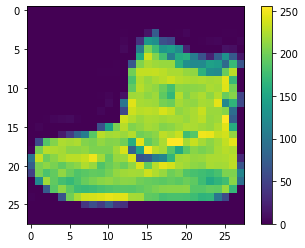

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

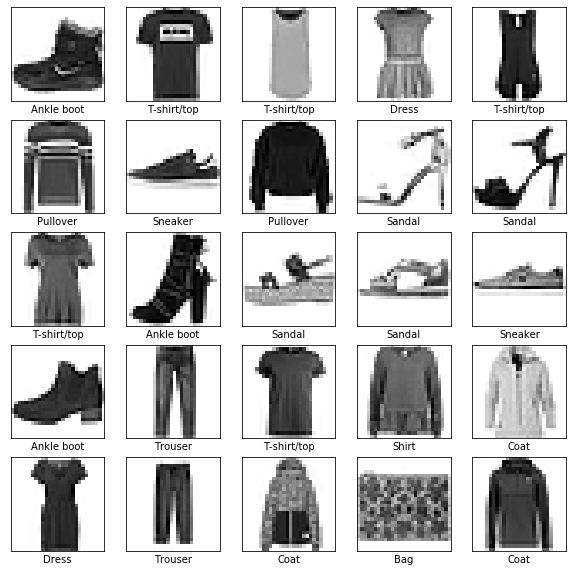

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model=keras.Sequential([
                     keras.layers.Flatten(input_shape=(28,28)),
                     keras.layers.Dense(128,activation='relu'),
                     keras.layers.Dense(10,activation='softmax')   
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4957 - accuracy: 0.8263
Epoch 2/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3746 - accuracy: 0.8662
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3356 - accuracy: 0.8784
Epoch 4/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3128 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2953 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2805 - accuracy: 0.8959
Epoch 7/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2688 - accuracy: 0.8997
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2566 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2484 - accuracy: 0.9057
Epoch

In [20]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

10000/1 - 1s - loss: 0.2443 - accuracy: 0.8816

Test accuracy: 0.8816


In [21]:
predictions=model.predict(test_images)
predictions[0]

array([5.1521619e-07, 5.3190914e-09, 7.8042660e-08, 1.4900511e-10,
       5.1889248e-08, 5.2471901e-03, 9.2654624e-08, 9.5369443e-02,
       1.3016976e-06, 8.9938134e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=predictions_array,true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

In [0]:
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label=predictions_array,true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

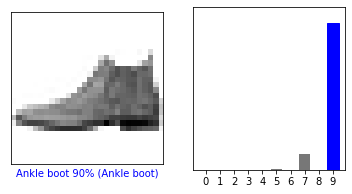

In [41]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

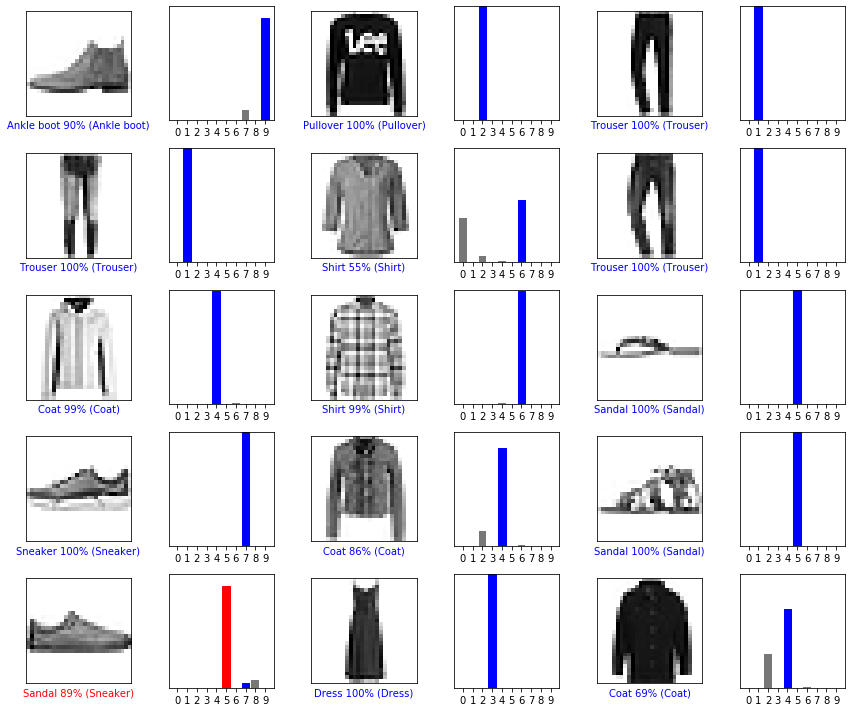

In [42]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [44]:
img=test_images[1]
print(img.shape)

(28, 28)


In [45]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [46]:
predictions_single=model.predict(img)
print(predictions_single)

[[2.8171503e-06 6.1197460e-14 9.9961144e-01 1.6424778e-09 3.0965879e-04
  3.0873958e-14 7.5798576e-05 2.2771281e-14 3.3882475e-07 6.3637928e-15]]


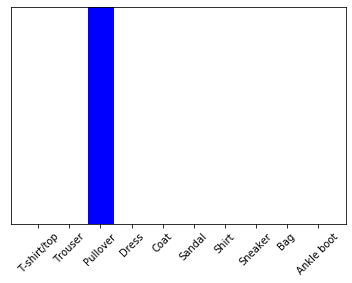

In [53]:
plot_value_array(1, predictions_single[0], test_labels)
_= plt.xticks(range(10), class_names, rotation=45)

In [54]:
np.argmax(predictions_single[0])

2